# Red Wine Quality Prediction Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import zscore
import warnings
warnings.simplefilter("ignore")
import joblib

In [2]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

Above we imported the libraries which we required for this Project

In [3]:
df = pd.read_csv("RedWine.csv")

I downloaded the entire dataset on my local computer from https://github.com/dsrscientist/DSData/blob/master/winequality-red.csv
    and then imported to jupiter notebook

In [4]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


So by taking a look at the above data frame I can see that the column quality is the target label making the remaining columns as the features that we can customize and use to predict our label. This classifies to be a Classification problem.

# Exploratory Data Analysis (EDA)

In [6]:
df.shape

(1599, 12)

We can see that there are total 1599 rows and 12 columns present in our dataset.

In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Fortunately we dont have any missing values in any of the columns of our dataset so we don't have to work on handling missing data.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


None of the columns have any object data type values and Target label is the only integer value making all the feature columns as float datatype.

In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


 Above we explore the descriptive statistical measures of the dataset.

Using the describe method I can see the count, mean, standard deviation, minimum, maximum and inter quantile values of our dataset.

As per my observation:

There is a big gap between 75% and max values of residual sugar column
There is a big gap between 75% and max values of free sulfur dioxide column
There is a huge gap between 75% and max value of total sulfur dioxide column
All these gaps indicate that there are outliers present in our dataset which might need to be treated so as to get a better model accuracy later.

In [10]:
df.skew()


fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

As acceptable range is +/-0.5

Here we see the skewness information present in our dataset. We will ignore quality column since it is our target label in the dataset. Now taking a look at all the feature columns we see that fixed acidity, volatile acidity, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, sulphates and alcohol are all outside the acceptable range of +/-0.5. This skewness indicates outliers being present in our dataset that will need to be treated if required.

# Visualization

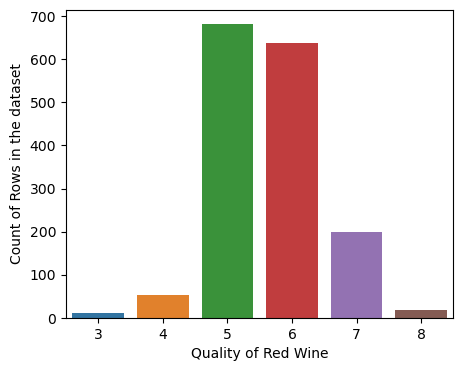

In [12]:
plt.figure(figsize=(5,4))
sns.countplot(x ='quality', data = df)
plt.xlabel('Quality of Red Wine')
plt.ylabel('Count of Rows in the dataset')
plt.show()

In the countplot representation we see the various categories of red wine quality and it shows that the number of data present for quality score 5 and 6 is way higher than it's counterparts. This indicates an imbalance which will need to be rectified so that our machine learning model do not get biased to a certain value during prediction.

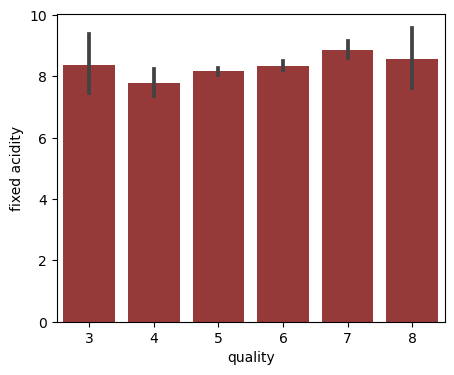

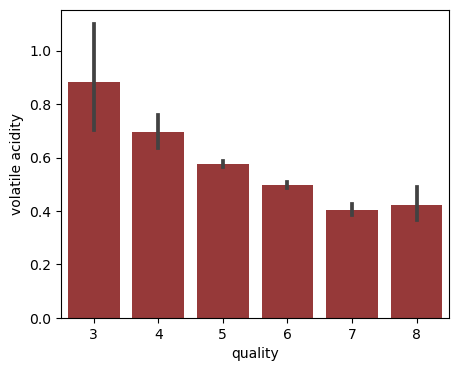

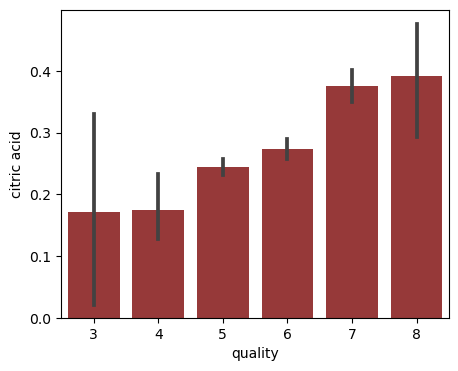

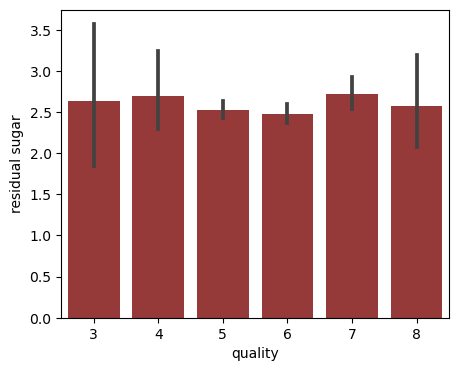

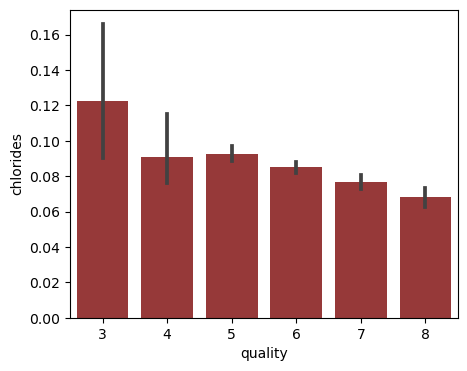

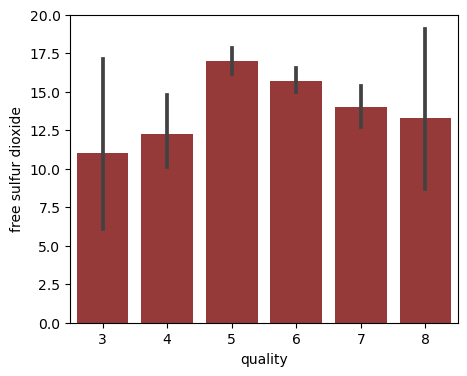

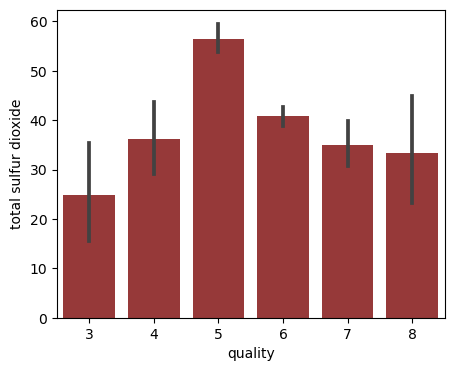

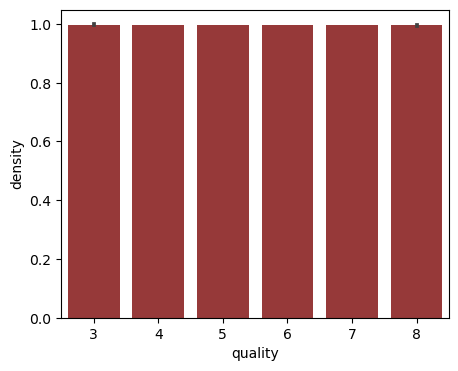

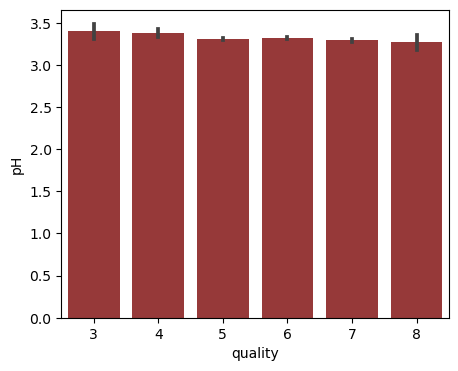

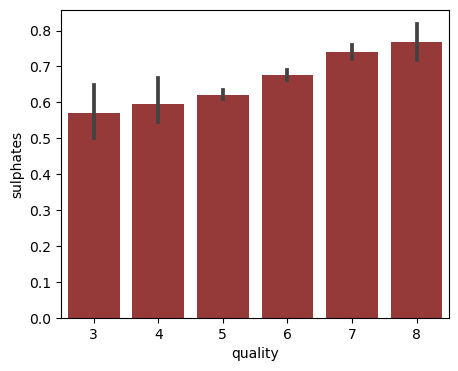

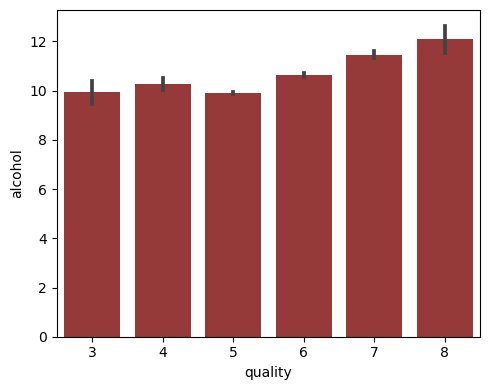

In [14]:
index=0
labels = df['quality']
features = df.drop('quality', axis=1)

for col in features.items():
    plt.figure(figsize=(5,4))
    sns.barplot(x=labels, y=col[index], data=df, color="brown")
plt.tight_layout()
plt.show()


With the feature vs label barplot we are able to see the trend corresponding to the impact each has with respect to predicting the quality column (our target variable).

Observations regarding feature compared to the label are: 
    01. fixed acidity vs quality - no fixed pattern 
    02. volatile acidity vs quality - there is a decreasing trend 
    03. citric acid vs quality - there is an increasing trend 
    04. residual sugar vs quality - no fixed pattern 
    05. chlorides vs quality - there is a decreasing trend 
    06. free sulfur dioxide vs quality - no fixed pattern as it is increasing then decreasing 
    07. total sulfur dioxide vs quality - no fixed pattern as it is increasing then decreasing
    08. density vs quality - no pattern at all 
    09. pH vs quality - no pattern at all 
    10. sulphates vs quality - there is an increasing trend 11. alcohol vs quality - there is an increasing trend

So here we can conclude that to get better quality wine citric acid, sulphates and alcohol columns play a major role.

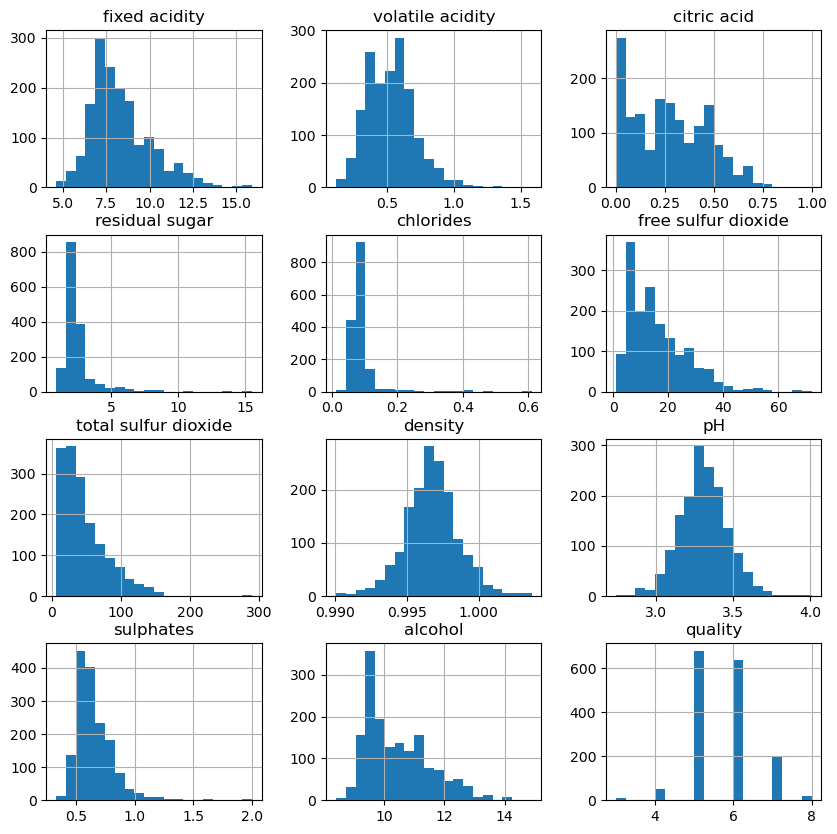

In [15]:
df.hist(bins=20, figsize=(10, 10))
plt.show()

Histograms for the columns containing continuous data

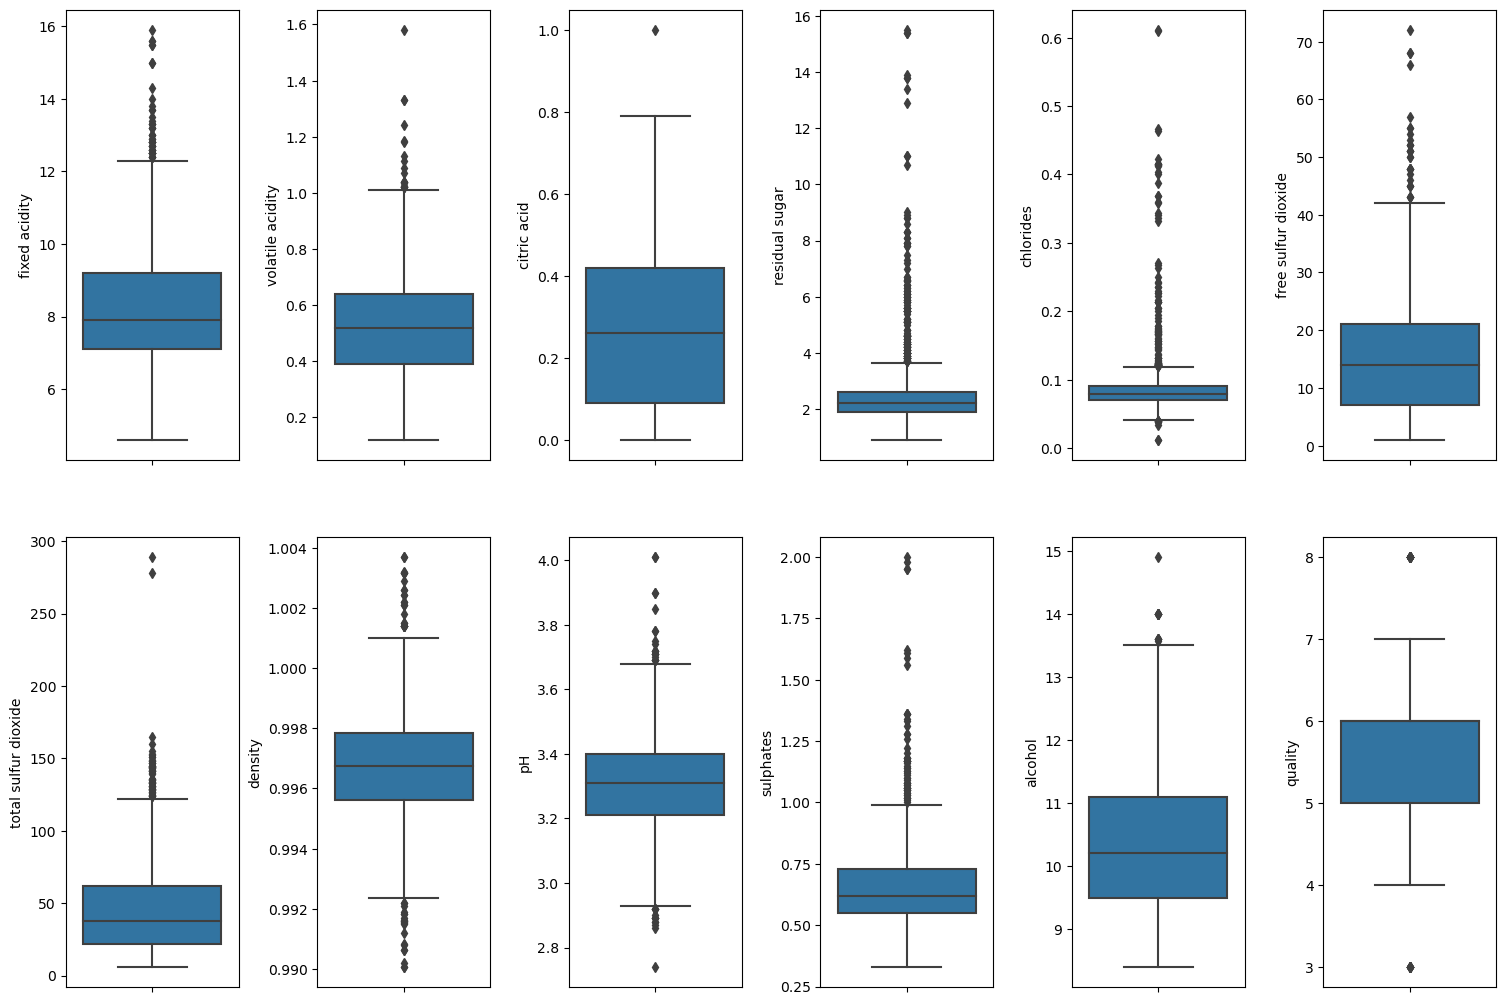

In [16]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

With the help of the above boxplot we are able to see the whisker details and outliers clearly. we can the continous outlier sections but the outliers that are single values and far away from the whiskers of the boxplot may need to be treated depending upon further analysis. Right now we are just trying to retain as much of data which is possible in the given dataset.

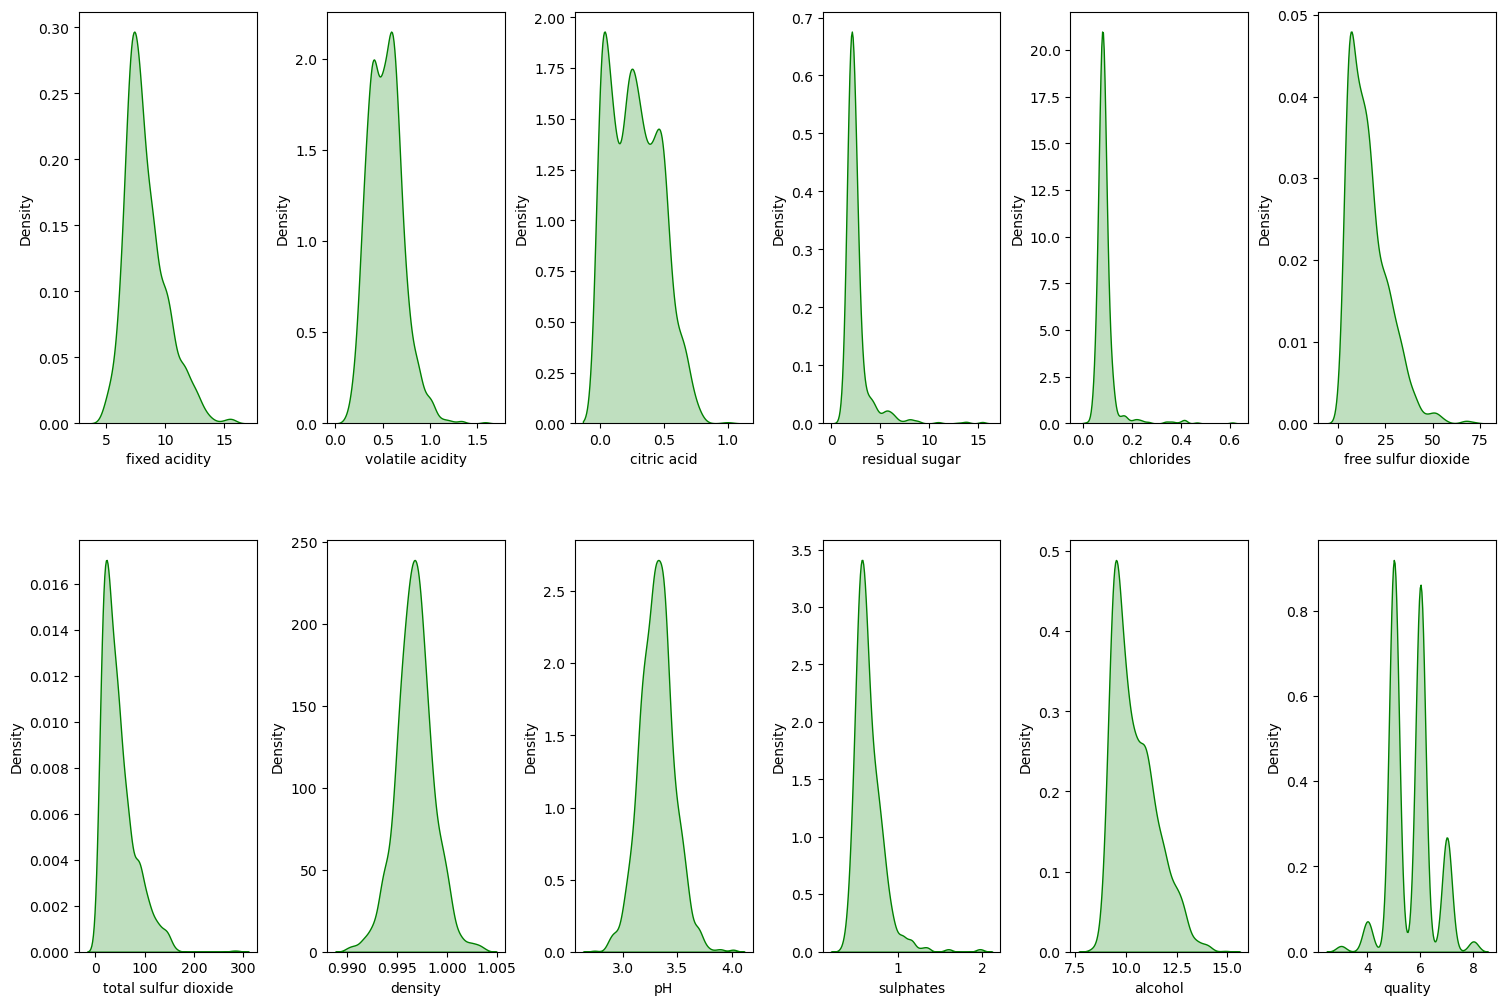

In [17]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.distplot(value, ax=ax[index], hist=False, color="g", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

The distribution plots show that few of the columns are in normal distribution category showing a proper bell shape curve. However, we do see skewness in most of the feature columns like citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, sulphates and alcohol columns. We are going to ignore the label column since it is a categorical column and will need to fix the imbalance data inside it.

With respect to the treatment of skewness and outliers I will perform the removal or treatment after I can see the accuracy dependency of the machine learning models.

# Correlation using a Heatmap

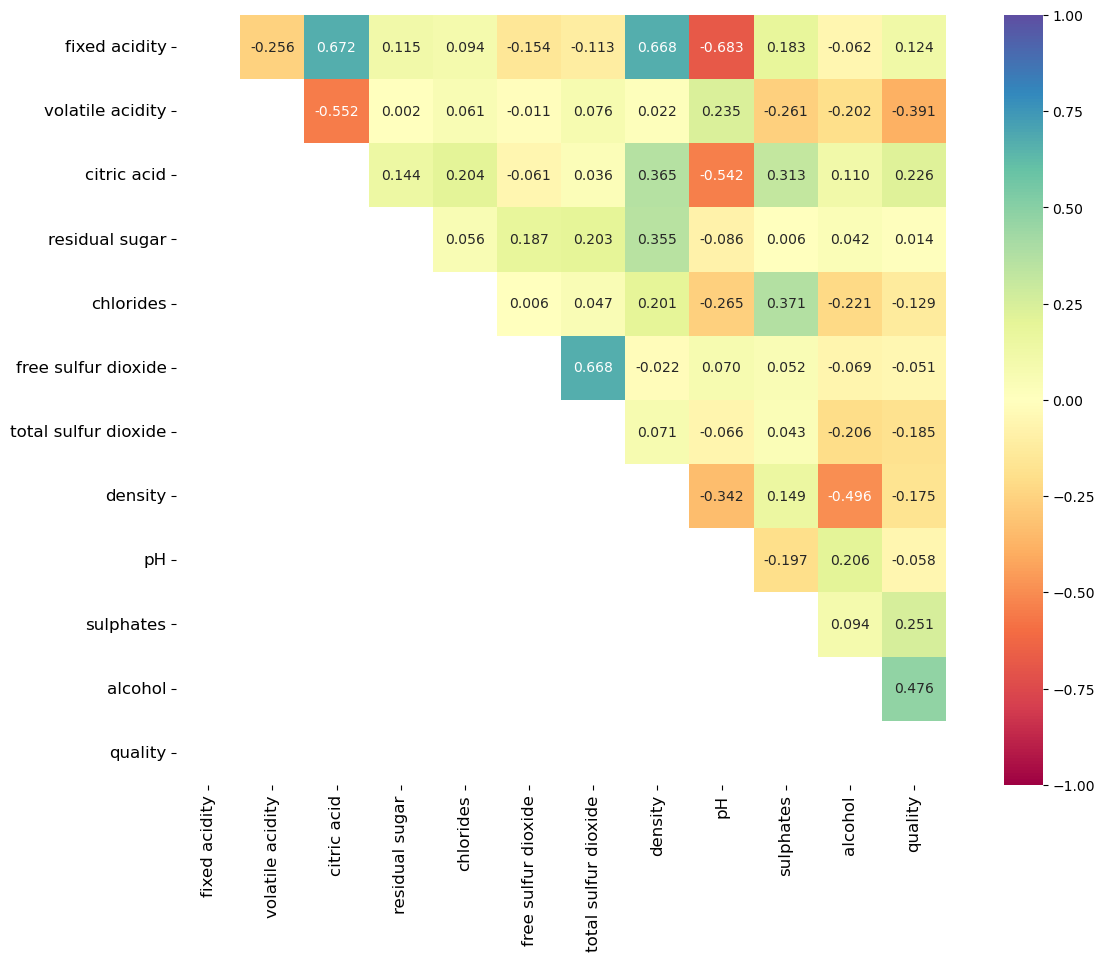

In [20]:
lower_triangle = np.tril(df.corr())
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="Spectral", mask=lower_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

We can see that the above heatmap shows the correlation matrix data wherein there are positive as well as negative correlations between the target label and other feture columns. A zero correlation indicates that there is no relationship between the variables. Looking at the above representation we observe that quality column is positively correlated with alcohol and it is negatively correlated with the volatile acidity. The quality column is least correlated with residual sugar showing a coefficient value of 0.014 that close to 0. Similarly we can bifurcate all the other positively and negatively correlated feature columns with respect to the target label.

Also there are some highly positive and negative correlated feature columns that can pose the concern for multicollinearity. If the correlation coefficient, assuming it to be the variable 'r', is exactly +1 or -1, then it is called perfect multicollinearity. But even if this 'r' is close to -1 or +1 then one of the features should be removed from the model if at all possible.

Right now we can see columns fixed acidity and citirc acid are positively correlated with a value of 0.672 which is close to 1. Similary, columns fixed acidity and density are positively correlated with a value of 0.668 again being close to 1. The other 2 column that's positively correlated are free sulfur dioxide and total sulfur dioxide with a value of 0.668 which is close to the value 1. The only negatively correlated columns that pop up are fixed acitidy and pH with a value -0.683 being close to the value -1.

We may need to deal with multicollinearity later if required to improve the accuracy of our machine learning models.

# Dropping a column

In [22]:
df = df.drop('free sulfur dioxide', axis=1)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,44.0,0.99547,3.57,0.71,10.2,5


We observe that free sulfur dioxide and total sulfur dioxide are both indicating towards the same feature of sulfur dioxide therefore we can drop the free option and keeping just the total option in our dataset.

# Outlier removal

In [23]:
df.shape

(1599, 11)

Confirming the number of columns and rows before removing the outliers from the dataset.

In [24]:
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

df=df[(z<3).all(axis=1)]
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,44.0,0.99547,3.57,0.71,10.2,5


We have used the Z score method to get rid of outliers present in our dataset that are not in the acceptable range of +/-0.5 value of skewness.

In [25]:
df.shape

(1464, 11)

Checking the number of rows present in the dataset after applying the outlier removal technique.

In [6]:
data_loss=(1599-1464)/1599*100 
data_loss

8.442776735459661

After removing the outliers we are checking the data loss percentage by comparing the rows in our original data set and the new data set post removal of the outliers.

1599 (number of rows in the original dataframe) and 1464 (number of rows after outlier removal)
 and total 8.44% data has been removed from original Dataset.

# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [7]:
X = df.drop('quality', axis=1)
Y = df['quality']

we have bifurcated the dataset into features and target variable where X represents all the feature columns and Y represents the target label column

# Taking care of class imbalance

In [8]:
Y.value_counts()


5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Listing the values of our label column to count the number of rows occupied by each category. This indicates class imbalance that we will need to fix by using the oversampling method

In [9]:
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

adding samples to make all the categorical quality values same


SMOTE is the over sampling mechanism that we are using to ensure that all the categories present in our target label have the same value.

In [10]:
Y.value_counts()

5    681
6    681
7    681
4    681
8    681
3    681
Name: quality, dtype: int64

After applying over sampling we are one again listing the values of our label column to cross verify the updated information. Here we see that we have successfully resolved the class imbalance problem and now all the categories have same data ensuring that the machine learning model does not get biased towards one category

In [11]:
Y

0       5
1       5
2       5
3       6
4       5
       ..
4081    8
4082    8
4083    8
4084    8
4085    8
Name: quality, Length: 4086, dtype: int64

# Coverting Target Variable into Binary Values

In [12]:
Y = Y.apply(lambda y_value:1 if y_value>=7 else 0)

1 is for good quality and 0 for bad (not good) quality

In [13]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
4081    1
4082    1
4083    1
4084    1
4085    1
Name: quality, Length: 4086, dtype: int64

By converting Target Variable into Binary values, we have tagged the categories present in our target label to 2 major class that are 0 for bad quality wine and 1 for good quality wine.

In [14]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000
...,...,...,...,...,...,...,...,...,...,...,...
4081,9.405862,0.430586,0.523635,2.272696,0.073085,6.860972,16.417084,0.995201,3.211390,0.690000,12.625125
4082,7.250689,0.396051,0.291414,2.025344,0.056760,16.605143,30.351700,0.994674,3.249431,0.758310,11.418274
4083,9.639807,0.310754,0.466324,1.965490,0.080053,40.690206,69.251999,0.994454,3.058588,0.648010,11.947352
4084,9.154582,0.454868,0.425132,2.544807,0.073312,6.655805,16.551935,0.994523,3.177597,0.688635,12.159063


# Feature Scaling

In [15]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.581745,0.470717,-1.348831,-0.575973,-0.295336,-0.258602,-0.096707,0.679712,1.184131,-0.630380,-1.126833
1,-0.335567,1.206630,-1.348831,-0.003533,0.174463,1.171816,1.078010,0.146161,-0.844225,0.120269,-0.784027
2,-0.335567,0.716021,-1.150096,-0.248864,0.046336,0.150089,0.615242,0.252871,-0.451640,-0.067393,-0.784027
3,1.756944,-1.246413,1.433459,-0.575973,-0.316691,0.354434,0.828827,0.786423,-1.105948,-0.505272,-0.784027
4,-0.581745,0.470717,-1.348831,-0.575973,-0.295336,-0.258602,-0.096707,0.679712,1.184131,-0.630380,-1.126833
...,...,...,...,...,...,...,...,...,...,...,...
4081,0.652752,-0.630756,1.252783,-0.271193,-0.357575,-0.681497,-0.722615,-0.706916,-0.769697,0.182823,1.637148
4082,-0.673637,-0.771948,0.099024,-0.473470,-0.706189,0.314091,-0.226577,-0.988419,-0.520796,0.610132,0.602858
4083,0.796732,-1.120676,0.968042,-0.522417,-0.208787,2.774927,1.158175,-1.105374,-1.769497,-0.079844,1.056286
4084,0.498103,-0.531483,0.763386,-0.048668,-0.352745,-0.702460,-0.717814,-1.068676,-0.990811,0.174287,1.237726


Even though all our feature columns were of float data type we may get little bias with the decimal place differences and was worried that it might make our model biased. Therefore we are using the Standard Scaler method to ensure all our feature columns have been standardized.

# Creating the training and testing data sets

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=20)

Here we take 20 percent of the complete dataset for training purpose and the remaing 80 percent with be used to train the machine learning models

In [17]:
def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

Here we defined a class that will perform the train-test split, training of machine learning model, predicting the label value, getting the accuracy score, generating the classification report, getting the cross validation score and the result of difference between the accuracy score and cross validation score for any machine learning model that calls for this function.

In [18]:
# Logistic Regression

model=LogisticRegression()
classify(model, X, Y)

Accuracy Score: 89.60880195599023

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       537
           1       0.82      0.89      0.85       281

    accuracy                           0.90       818
   macro avg       0.88      0.89      0.89       818
weighted avg       0.90      0.90      0.90       818

Cross Validation Score: 88.89104691563446

Accuracy Score - Cross Validation Score is 0.7177550403557689


Here we Created the Logistic Regression Model and checked for it's evaluation metrics.

In [19]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)

Accuracy Score: 93.15403422982885

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.95       537
           1       0.88      0.93      0.90       281

    accuracy                           0.93       818
   macro avg       0.92      0.93      0.93       818
weighted avg       0.93      0.93      0.93       818

Cross Validation Score: 91.09351105631251

Accuracy Score - Cross Validation Score is 2.0605231735163443


Here we Created the Support Vector Classifier Model and checked for it's evaluation metrics.

In [20]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)

Accuracy Score: 92.42053789731052

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       537
           1       0.86      0.93      0.89       281

    accuracy                           0.92       818
   macro avg       0.91      0.92      0.92       818
weighted avg       0.93      0.92      0.92       818

Cross Validation Score: 90.72532642232748

Accuracy Score - Cross Validation Score is 1.69521147498304


Here we Created the Decision Tree Classifier Model and checked for it's evaluation metrics.

In [21]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)

Accuracy Score: 95.35452322738386

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96       537
           1       0.91      0.95      0.93       281

    accuracy                           0.95       818
   macro avg       0.94      0.95      0.95       818
weighted avg       0.95      0.95      0.95       818

Cross Validation Score: 93.41807495368887

Accuracy Score - Cross Validation Score is 1.9364482736949924


Here we Created the Random Forest Classifier Model and checked for it's evaluation metrics.

In [22]:
# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)

Accuracy Score: 90.58679706601467

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.89      0.93       537
           1       0.81      0.94      0.87       281

    accuracy                           0.91       818
   macro avg       0.89      0.91      0.90       818
weighted avg       0.91      0.91      0.91       818

Cross Validation Score: 89.57627194728165

Accuracy Score - Cross Validation Score is 1.010525118733014


Here we Created the K Neighbors Classifier Model and checked for it's evaluation metrics.

Here we Created the Extra Trees Classifier Model and checked for it's evaluation metrics.

In [23]:
# XGB Classifier

model=xgb.XGBClassifier(verbosity=0)
classify(model, X, Y)

Accuracy Score: 95.35452322738386

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       537
           1       0.92      0.95      0.93       281

    accuracy                           0.95       818
   macro avg       0.95      0.95      0.95       818
weighted avg       0.95      0.95      0.95       818

Cross Validation Score: 94.2501488838945

Accuracy Score - Cross Validation Score is 1.1043743434893685


Here we Created the XGB Classifier Model and checked for it's evaluation metrics.

In [24]:
# LGBM Classifier

model=lgb.LGBMClassifier()
classify(model, X, Y)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1081, number of negative: 2187
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001163 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 3268, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.330783 -> initscore=-0.704644
[LightGBM] [Info] Start training from score -0.704644
Accuracy Score: 96.08801955990221

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       537
           1       0.92      0.96      0.94       281

    accuracy                           0.96       818
   macro avg       0.95      0.96      0.96       818
weighted avg       0.96      0.

Here we Created the LGBM Classifier Model and checked for it's evaluation metrics.

# Hyper parameter tuning on the best ML Model

In [29]:
# Choosing Support Vector Classifier

svc_param = {'kernel' : ['poly', 'sigmoid', 'rbf'],
             'gamma' : ['scale', 'auto'],
             'shrinking' : [True, False],
             'random_state' : [21,42,104],
             'probability' : [True, False],
             'decision_function_shape' : ['ovo', 'ovr'],
             'verbose' : [True, False]}

After comparing all the classification models we cam  select Support Vector Classifier as our best model because  by comparing with all models and have listed down it's parameters above referring the sklearn webpage.

In [30]:
GSCV = GridSearchCV(SVC(), svc_param, cv=5)

Here we are using the Grid Search CV method for hyper parameter tuning my best model.

In [31]:
GSCV.fit(X_train,Y_train)


[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'sigmoid', 'rbf'],
                         'probability': [True, False],
                         'random_state': [21, 42, 104],
                         'shrinking': [True, False], 'verbose': [True, False]})

we have trained the Grid Search CV with the list of parameters and it should check for best possible outcomes.

In [32]:
GSCV.best_params_

{'decision_function_shape': 'ovo',
 'gamma': 'scale',
 'kernel': 'rbf',
 'probability': True,
 'random_state': 21,
 'shrinking': True,
 'verbose': True}

Here the Grid Search CV has provided us with the best parameters list out of all the combinations it used to train the model.

In [33]:
Final_Model = SVC(decision_function_shape='ovo', gamma='scale', kernel='rbf', probability=True, random_state=21,
                 shrinking=True, verbose=True)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

[LibSVM]Accuracy score for the Best Model is: 92.78728606356968


we have successfully incorporated the Hyper Parameter Tuning on our Final Model and received the accuracy score for it.

# AUC ROC Curve

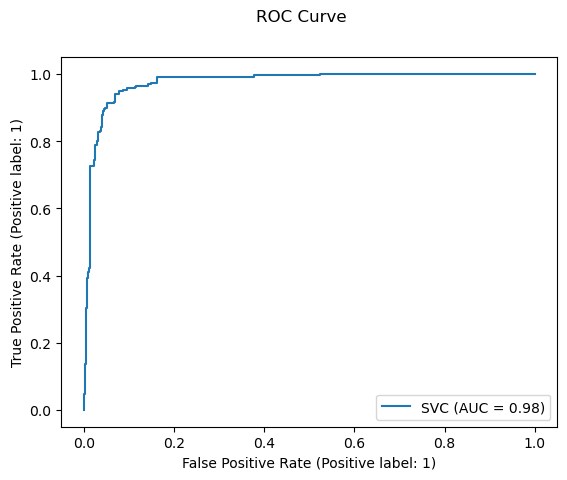

In [34]:
disp = metrics.plot_roc_curve(Final_Model, X_test, Y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

We have generated the ROC Curve for our final model and it shows the AUC score for our final model to be of 98%

# Confusion Matrix

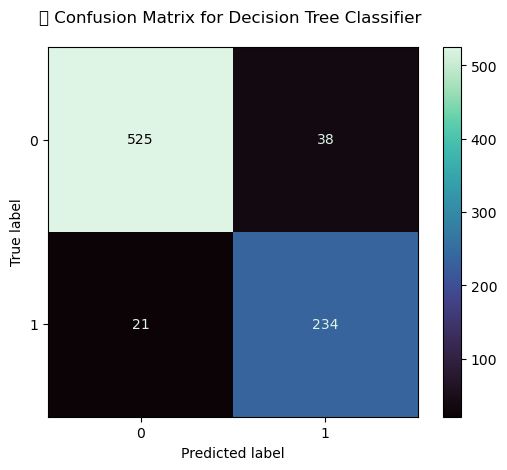

In [35]:
class_names = df.columns
metrics.plot_confusion_matrix(Classifier, X_test, Y_test, cmap='mako')
plt.title('\t Confusion Matrix for Decision Tree Classifier \n')
plt.show()

With the help of above confusion matrix we can able to understand the number of times that we got the correct outputs and the number of times our model missed to provide the correct prediction (depicting in the black boxes)

# Saving the model

In [36]:
filename = "FinalModel_1.pkl"
joblib.dump(Final_Model, filename)

['FinalModel_1.pkl']

Finally we are saving the best classification model using the joblib library.